In [82]:
import matplotlib.pyplot as plt
import csv

files = ["4q-1000samples.csv", "4q-preh-1000samples.csv"]
keys = ["normal", 'preh']

data_expr = {"normal": {}, "preh": {}}
data_ent = {"normal": {}, "preh": {}}

i=-1
for filename in files: 
    i+=1
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)

        # Use a counter to track the current line number
        line_count = 0

        # Loop through the rows in the CSV file
        for row in csv_reader:
            line_count += 1
            if line_count <= 3:
                continue

            id = row[0].partition("-")[0]
            L = int(row[1])
            expr = float(row[2])
            ent = float(row[3])
            t = float(row[4])

            data_expr[keys[i]][L] = data_expr[keys[i]].get(L, {})
            data_expr[keys[i]][L][id] = expr

            data_ent[keys[i]][L] = data_ent[keys[0]].get(L, {})
            data_ent[keys[i]][L][id] = ent

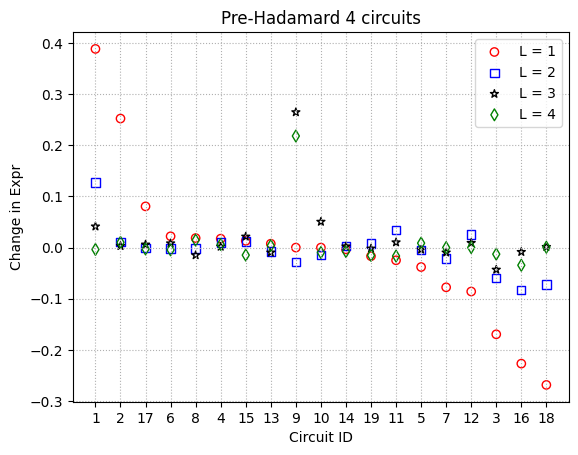

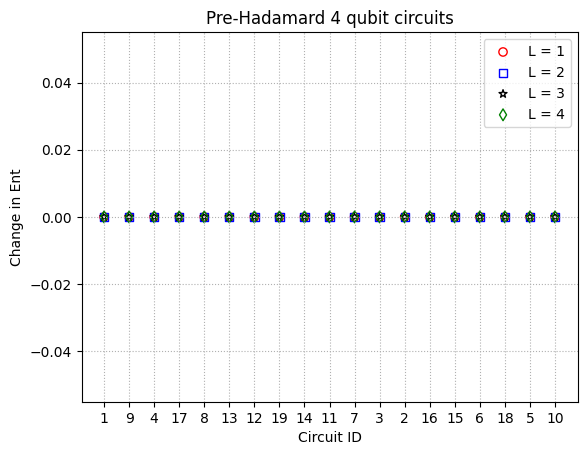

In [87]:
# Plotting expressibility

my_xticks = list(data_expr["normal"][1].keys())
L_max = len(data_expr["normal"].keys())

def comp_expr(circuit):
    return -data_expr["preh"][1][circuit]+data_expr["normal"][1][circuit]

def comp_ent(circuit):
    return data_ent["normal"][1][circuit]


my_xticks.sort(key=comp_expr)

markers=["o", "s", "*", "d", "p", "v", "h", "^"]
colors = ["r", "b", "k", "g", "m", "c", "y"]

for L in range(1, L_max+1):
    x = [i+1 for i in range(len(my_xticks))]
    y = [data_expr["preh"][L][c]-data_expr["normal"][L][c] for c in my_xticks]
    plt.scatter(x,y,label=f"L = {L}", marker=markers[L-1], facecolors="none", edgecolors=colors[L-1])

plt.xlabel('Circuit ID')
plt.ylabel('Change in Expr')
plt.xticks([i+1 for i in range(len(my_xticks))], my_xticks)
plt.legend()
plt.title("Pre-Hadamard 4 circuits") 
plt.grid(True, linestyle='dotted')
plt.show()

# Plotting entangling capacity

my_xticks.sort(key=comp_ent)

for L in range(1, L_max+1):
    x = [i+1 for i in range(len(my_xticks))]
    y = [data_ent["preh"][L][c] - data_ent["normal"][L][c] for c in my_xticks]
    plt.scatter(x,y,label=f"L = {L}", marker=markers[L-1], facecolors="none", edgecolors=colors[L-1])

plt.xlabel('Circuit ID')
plt.ylabel('Change in Ent')
plt.xticks([i+1 for i in range(len(my_xticks))], my_xticks)
plt.legend()
plt.grid(True, linestyle='dotted')
plt.title("Pre-Hadamard 4 qubit circuits")
plt.show()
